# Multiple Linear Regression

#### This project utilizes a linear regression model to analyze the impact of investments made in various advertising channels such as TV, radio, and newspapers on sales figures, aiming to determine which advertising channel is the most effective. The model will quantitatively evaluate the relationship between advertising expenditures (TV, radio, newspaper) and sales figures, and in this context, attempt to ascertain the contribution of each advertising channel to sales.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.shape

(200, 4)

In [7]:
#There are no NaN values in the data frame, and all values are numerical. Therefore, we can proceed with the training.

### Training

In [8]:
x = df[['TV', 'Radio', 'Newspaper']]

In [9]:
y = df[['Sales']]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [11]:
lr=LinearRegression()

In [12]:
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
tahmin=lr.predict(x_test)

In [14]:
r2_score(y_test,tahmin)

0.899438024100912

In [15]:
mean_squared_error(y_test,tahmin)**.5

1.7815996615334502

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [17]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.984045,0.709650,0.608348
XGBRegressor,0.972470,0.932166,0.725829
Extra Tree,0.959621,1.128938,0.915000
Decision Tree,0.946647,1.297690,0.945000
KNeighborsRegressor,0.910620,1.679625,1.189000
Lasso,0.900401,1.773046,1.452202
ElasticNet,0.899961,1.776959,1.456659
Ridge,0.899438,1.781599,1.460766
Linear,0.899438,1.781600,1.460757


In [25]:
tahmin_duz = tahmin.ravel()
#The prediction array is provided as a two-dimensional array. Typically, predictions from a LinearRegression model are already automatically
#generated as two-dimensional, so flattening it requires using the flatten command.

In [27]:
if isinstance(y_test, pd.DataFrame):
    y_test_duz = y_test.squeeze()  
else:
    y_test_duz = y_test

In [28]:
results_df = pd.DataFrame({
    'Actual Sales': y_test_duz,
    'Predicted Sales': tahmin_duz
}, index=y_test.index)

In [30]:
results_df.sort_index(inplace=True)

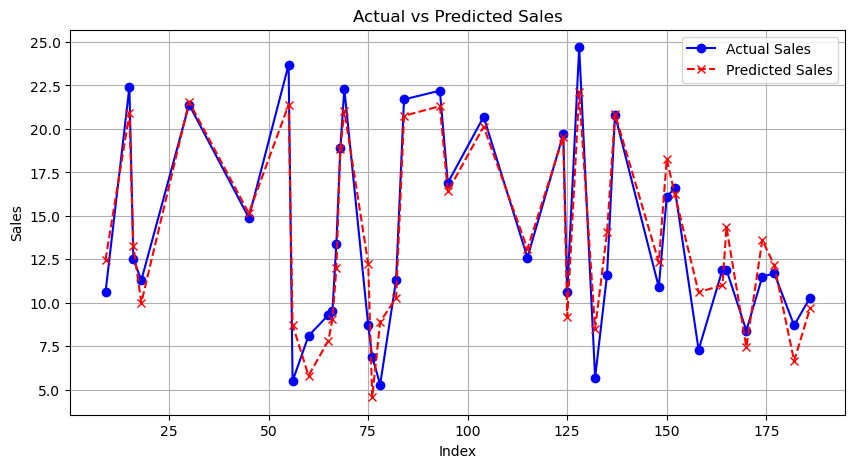

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(results_df['Actual Sales'], label='Actual Sales', color='blue', marker='o')
plt.plot(results_df['Predicted Sales'], label='Predicted Sales', color='red', linestyle='--', marker='x')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
coefficients = lr.coef_[0]

In [36]:
features = x.columns

In [37]:
feature_importance = pd.Series(coefficients, index=features)

In [38]:
feature_importance

TV           0.044730
Radio        0.189195
Newspaper    0.002761
dtype: float64

In [ ]:
#These output values represent the price of each additional unit of expenditure on each advertisement in terms of sales.